**This script contains the following points:**

1. Importing libraries
2. Importing data
3. Grouping & aggregating data
    - Calculate mean values based on departments IDs (Question 2)
    - Create a loyalty flag based on number of orders (Question 4)
    - Determine spending habits of the three types of customers (Question 5)
    - Create order frequency flag based on days since prior order (Question 7)
4. Exporting data

# 1. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os

# 2. Importing data

In [2]:
# Turn project folder path into a string
path = r'/Users/sarahtischer/Desktop/CareerFoundry/Data Immersion/Achievement 4/01-2024_Instacart_Basket_Analysis'

In [3]:
# Import "df_ords_prods_merged(2).pkl"
df_ords_prods_merged = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_data', 'orders_products_merged(2).pkl'))

In [4]:
df_ords_prods_merged.shape

(32404859, 17)

# 3. Grouping & aggregating data

### Calculate mean values based on departments IDs (Question 2)

In [5]:
# Group dataframe by 'department_id' & aggregate mean for 'order_number'
df_ords_prods_merged.groupby('department_id').agg({'order_number': ['mean']})

,order_number
,mean
department_id,
1,15.457838
2,17.277920
3,17.170395
4,17.811403
5,15.215751
6,16.439806
7,17.225802
8,15.340650


#### *<mark>Answer (Question 3):</mark> In general, the means for each department in the entire dataset seem slightly higher than those in the subset. The differences are relatively small but noticeable. Above that, the relative ordering of departments by mean order_number is consistent between the subset and the entire dataset. Departments that have higher means in the subset also tend to have higher means in the entire dataset, and vice versa.*

#### *<mark>Note:</mark> The results I got for the subset when I followed along with the Exercise were different from those shown in the screenshot of 'Aggregating Data with agg()'. This could be due to different ordering, which I did not change.*

The output I got in my Exercise notebook looks like this:

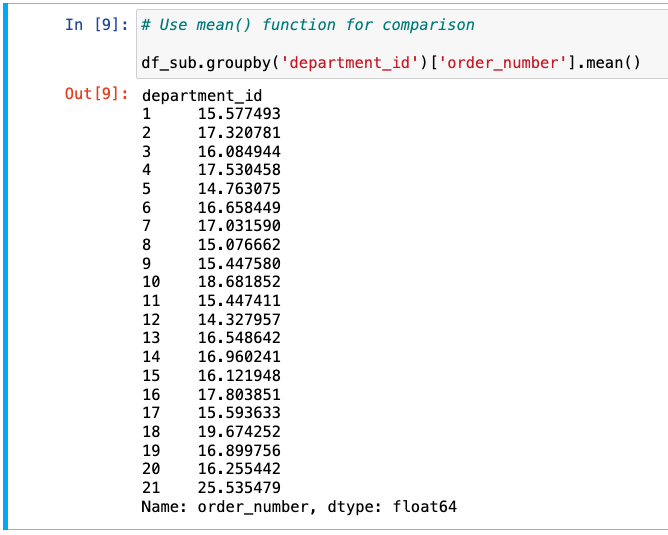

### Create a loyalty flag based on number of orders (Question 4)

In [6]:
# 1. Group data by 'user_id' & 2. generate 'max_order' for each user
#df_ords_prods_merged['max_order'] = df_ords_prods_merged.groupby(['user_id'])['order_number'].transform(np.max)

# Use string instead of np. following FutureWarning caused by the above command
df_ords_prods_merged['max_order'] = df_ords_prods_merged.groupby(['user_id'])['order_number'].transform('max')

In [7]:
# Check the sample output for relevant columns
df_ords_prods_merged[['order_number', 'max_order']].sample(10)

,order_number,max_order
16118583,29,30
22489529,3,6
8161708,1,4
15731792,2,32
26888858,30,31
10842693,7,24
6766851,29,57
15121938,17,21
7735871,5,5
12611322,5,9


In [8]:
# 3. Assign loyalty flag based on 'max_order' value
df_ords_prods_merged.loc[df_ords_prods_merged['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'
df_ords_prods_merged.loc[(df_ords_prods_merged['max_order'] <= 40) & (df_ords_prods_merged['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'
df_ords_prods_merged.loc[df_ords_prods_merged['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [9]:
# Check frequencies of new column 'loyalty_flag'
df_ords_prods_merged['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

In [10]:
# Check the sample output for relevant columns
df_ords_prods_merged[['order_number', 'loyalty_flag']].sample(10)

,order_number,loyalty_flag
16125380,24,Regular customer
24156346,36,Loyal customer
13118807,2,New customer
15101097,26,Regular customer
24708427,9,Regular customer
846384,28,Regular customer
28000286,13,Regular customer
2791437,6,Loyal customer
24230734,1,Regular customer
26411337,45,Loyal customer


### Determine spending habits of the three types of customers (Question 5)

In [11]:
# Group by loyalty flag and aggregate mean, minimum and maximum price
df_ords_prods_merged.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                       mean  min      max
loyalty_flag                             
Loyal customer    10.386336  1.0  99999.0
New customer      13.294670  1.0  99999.0
Regular customer  12.495717  1.0  99999.0

#### *<mark>Answer (Question 5):</mark> Basic statistics show that, on average, loyal customers order lower-priced products, while new and regular customers order higher-priced products.*

### Create spending flag based on average prices (Question 6)

In [12]:
# 1. Group data by 'user_id' & 2. generate 'avg_price' for each user
#df_ords_prods_merged['avg_price'] = df_ords_prods_merged.groupby(['user_id'])['prices'].transform(np.mean)

# Use string instead of np. following FutureWarning caused by the above command
df_ords_prods_merged['avg_price'] = df_ords_prods_merged.groupby(['user_id'])['prices'].transform('mean')

In [13]:
# Check the sample output for relevant columns
df_ords_prods_merged[['avg_price', 'prices']].sample(10)

,avg_price,prices
23180706,8.520513,3.9
26021258,7.534694,7.1
11502948,7.752381,3.4
5048775,7.701706,4.6
5156094,7.265363,7.7
11523181,7.718623,4.6
21985823,7.719241,11.8
16188714,9.209052,5.5
28881740,7.040476,8.5
3394012,9.089583,3.6


In [14]:
# 3. Assign spending flag based on 'avg_price' value
df_ords_prods_merged.loc[df_ords_prods_merged['avg_price'] >= 10, 'spending_flag'] = 'High spender'
df_ords_prods_merged.loc[df_ords_prods_merged['avg_price'] < 10, 'spending_flag'] = 'Low spender'

In [15]:
# Check frequencies of new column 'loyalty_flag'
df_ords_prods_merged['spending_flag'].value_counts(dropna = False)

spending_flag
Low spender     31770614
High spender      634245
Name: count, dtype: int64

In [16]:
# Check the sample output for relevant columns
df_ords_prods_merged[['avg_price', 'prices', 'spending_flag']].sample(10)

,avg_price,prices,spending_flag
5863614,8.069639,7.2,Low spender
28712582,6.463636,4.2,Low spender
23857236,8.029412,12.8,Low spender
15192039,7.956250,7.4,Low spender
6147217,9.163229,7.7,Low spender
22388011,8.047368,6.6,Low spender
676106,8.143151,4.2,Low spender
30581441,7.713368,4.0,Low spender
26882384,9.030696,13.2,Low spender
12518988,7.391912,5.5,Low spender


### Create order frequency flag based on days since prior order (Question 7)

In [17]:
# 1. Group data by 'user_id' & 2. generate 'median_frequency' for each user
#df_ords_prods_merged['median_frequency'] = df_ords_prods_merged.groupby(['user_id'])['days_since_prior_order'].transform(np.median)

# Use string instead of np. following FutureWarning caused by the above command
df_ords_prods_merged['median_frequency'] = df_ords_prods_merged.groupby(['user_id'])['days_since_prior_order'].transform('median')

In [18]:
# Check the sample output for relevant columns
df_ords_prods_merged[['days_since_prior_order', 'median_frequency']].sample(10)

,days_since_prior_order,median_frequency
12763285,27.0,7.0
8017115,4.0,4.0
5528562,8.0,7.0
10225575,7.0,8.0
29883594,3.0,5.0
17975358,4.0,3.0
30484287,22.0,9.0
30958615,14.0,7.0
20026215,7.0,7.0
1447469,NaN,22.0


In [19]:
# 3. Assign frequency flag based on 'median_frequency' value
df_ords_prods_merged.loc[df_ords_prods_merged['median_frequency'] > 20, 'frequency_flag'] = 'Non-frequent customer'
df_ords_prods_merged.loc[(df_ords_prods_merged['median_frequency'] <= 20) & (df_ords_prods_merged['median_frequency'] > 10), 'frequency_flag'] = 'Regular customer'
df_ords_prods_merged.loc[df_ords_prods_merged['median_frequency'] <= 10, 'frequency_flag'] = 'Frequent customer'

In [20]:
# Check frequencies of new column 'frequency_flag'
df_ords_prods_merged['frequency_flag'].value_counts(dropna = False)

frequency_flag
Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
nan                             5
Name: count, dtype: int64

In [21]:
df_ords_prods_merged.shape

(32404859, 23)

In [25]:
# Assign rows with missing values to df_nan and print the output
df_nan = df_ords_prods_merged[(df_ords_prods_merged['frequency_flag'] == 'nan')]

df_nan

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,_merge,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_frequency,frequency_flag
6234909,10749,Organic Red Bell Pepper,83,4,5.7,895835,159838,1,0,17,...,both,Mid-range product,Busiest day,Average orders,1,New customer,7.42,Low spender,NaN,nan
12947653,21334,Organic Peeled Garlic,123,4,10.2,895835,159838,1,0,17,...,both,Mid-range product,Busiest day,Average orders,1,New customer,7.42,Low spender,NaN,nan
13839012,22198,4X Ultra Concentrated Natural Laundry Detergen...,75,17,1.7,895835,159838,1,0,17,...,both,Low-range product,Busiest day,Average orders,1,New customer,7.42,Low spender,NaN,nan
14758536,23695,California Veggie Burger,42,1,4.7,895835,159838,1,0,17,...,both,Low-range product,Busiest day,Average orders,1,New customer,7.42,Low spender,NaN,nan
21673807,33401,Goat Cheese Crumbles,21,16,14.8,895835,159838,1,0,17,...,both,Mid-range product,Busiest day,Average orders,1,New customer,7.42,Low spender,NaN,nan


#### *<mark>Note:</mark> The reason for NaN values may be customers who only placed one order.*

# 4. Exporting data

In [ ]:
df_ords_prods_merged.shape

In [ ]:
# Export df_ords_prods_merged as "orders_products_merged(3).pkl" 
df_ords_prods_merged.to_pickle(os.path.join(path, '02_Data', 'Prepared_data', 'orders_products_merged(3).pkl'))